# Number Recognition

This notebook will work on a popular handwritten digits datababase called MNIST.

**Main goals are**: 

    - Being able to format input data
    - Retreiving metrics about original dataset
    - Choosing a model based on our problem
    - Training the model properly
    - Check model performances

In [5]:
# Fetching data and first raw visualization using embded scikit-learn functionality
from sklearn.datasets import fetch_openml

# Load data from https://www.openml.org/d/554
X, y = fetch_openml("mnist_784", version=1, return_X_y=True, as_frame=False)

To prevent you from long and unecessary reloading please **do not execute above** cell multiple times, only one should do the trick

In [2]:
# Displaying single raw feature
print(X[0])
y[0]

[  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
   0   0   0   0   0   0   0   0   3  18  18  18 126 136 175  26 166 255
 247 127   0   0   0   0   0   0   0   0   0   0   0   0  30  36  94 154
 170 253 253 253 253 253 225 172 253 242 195  64   0   0   0   0   0   0
   0   0   0   0   0  49 238 253 253 253 253 253 253 253 253 251  93  82
  82  56  39   0   0   0   0   0   0   0   0   0   0   0   0  18 219 253
 253 253 253 253 198 182 247 241   0   0   0   0   

'5'

### Bellow we expose some data problems regarding shape and display requirements.
Here each sample is composed of a **784 vector** array and represent a **28 by 28** image

```Note : The initial format is really helpful when it comes to ML but not really representative for human visualization```

In [9]:
import numpy as np
np.shape(X[0])

(784,)

Should display a : 5


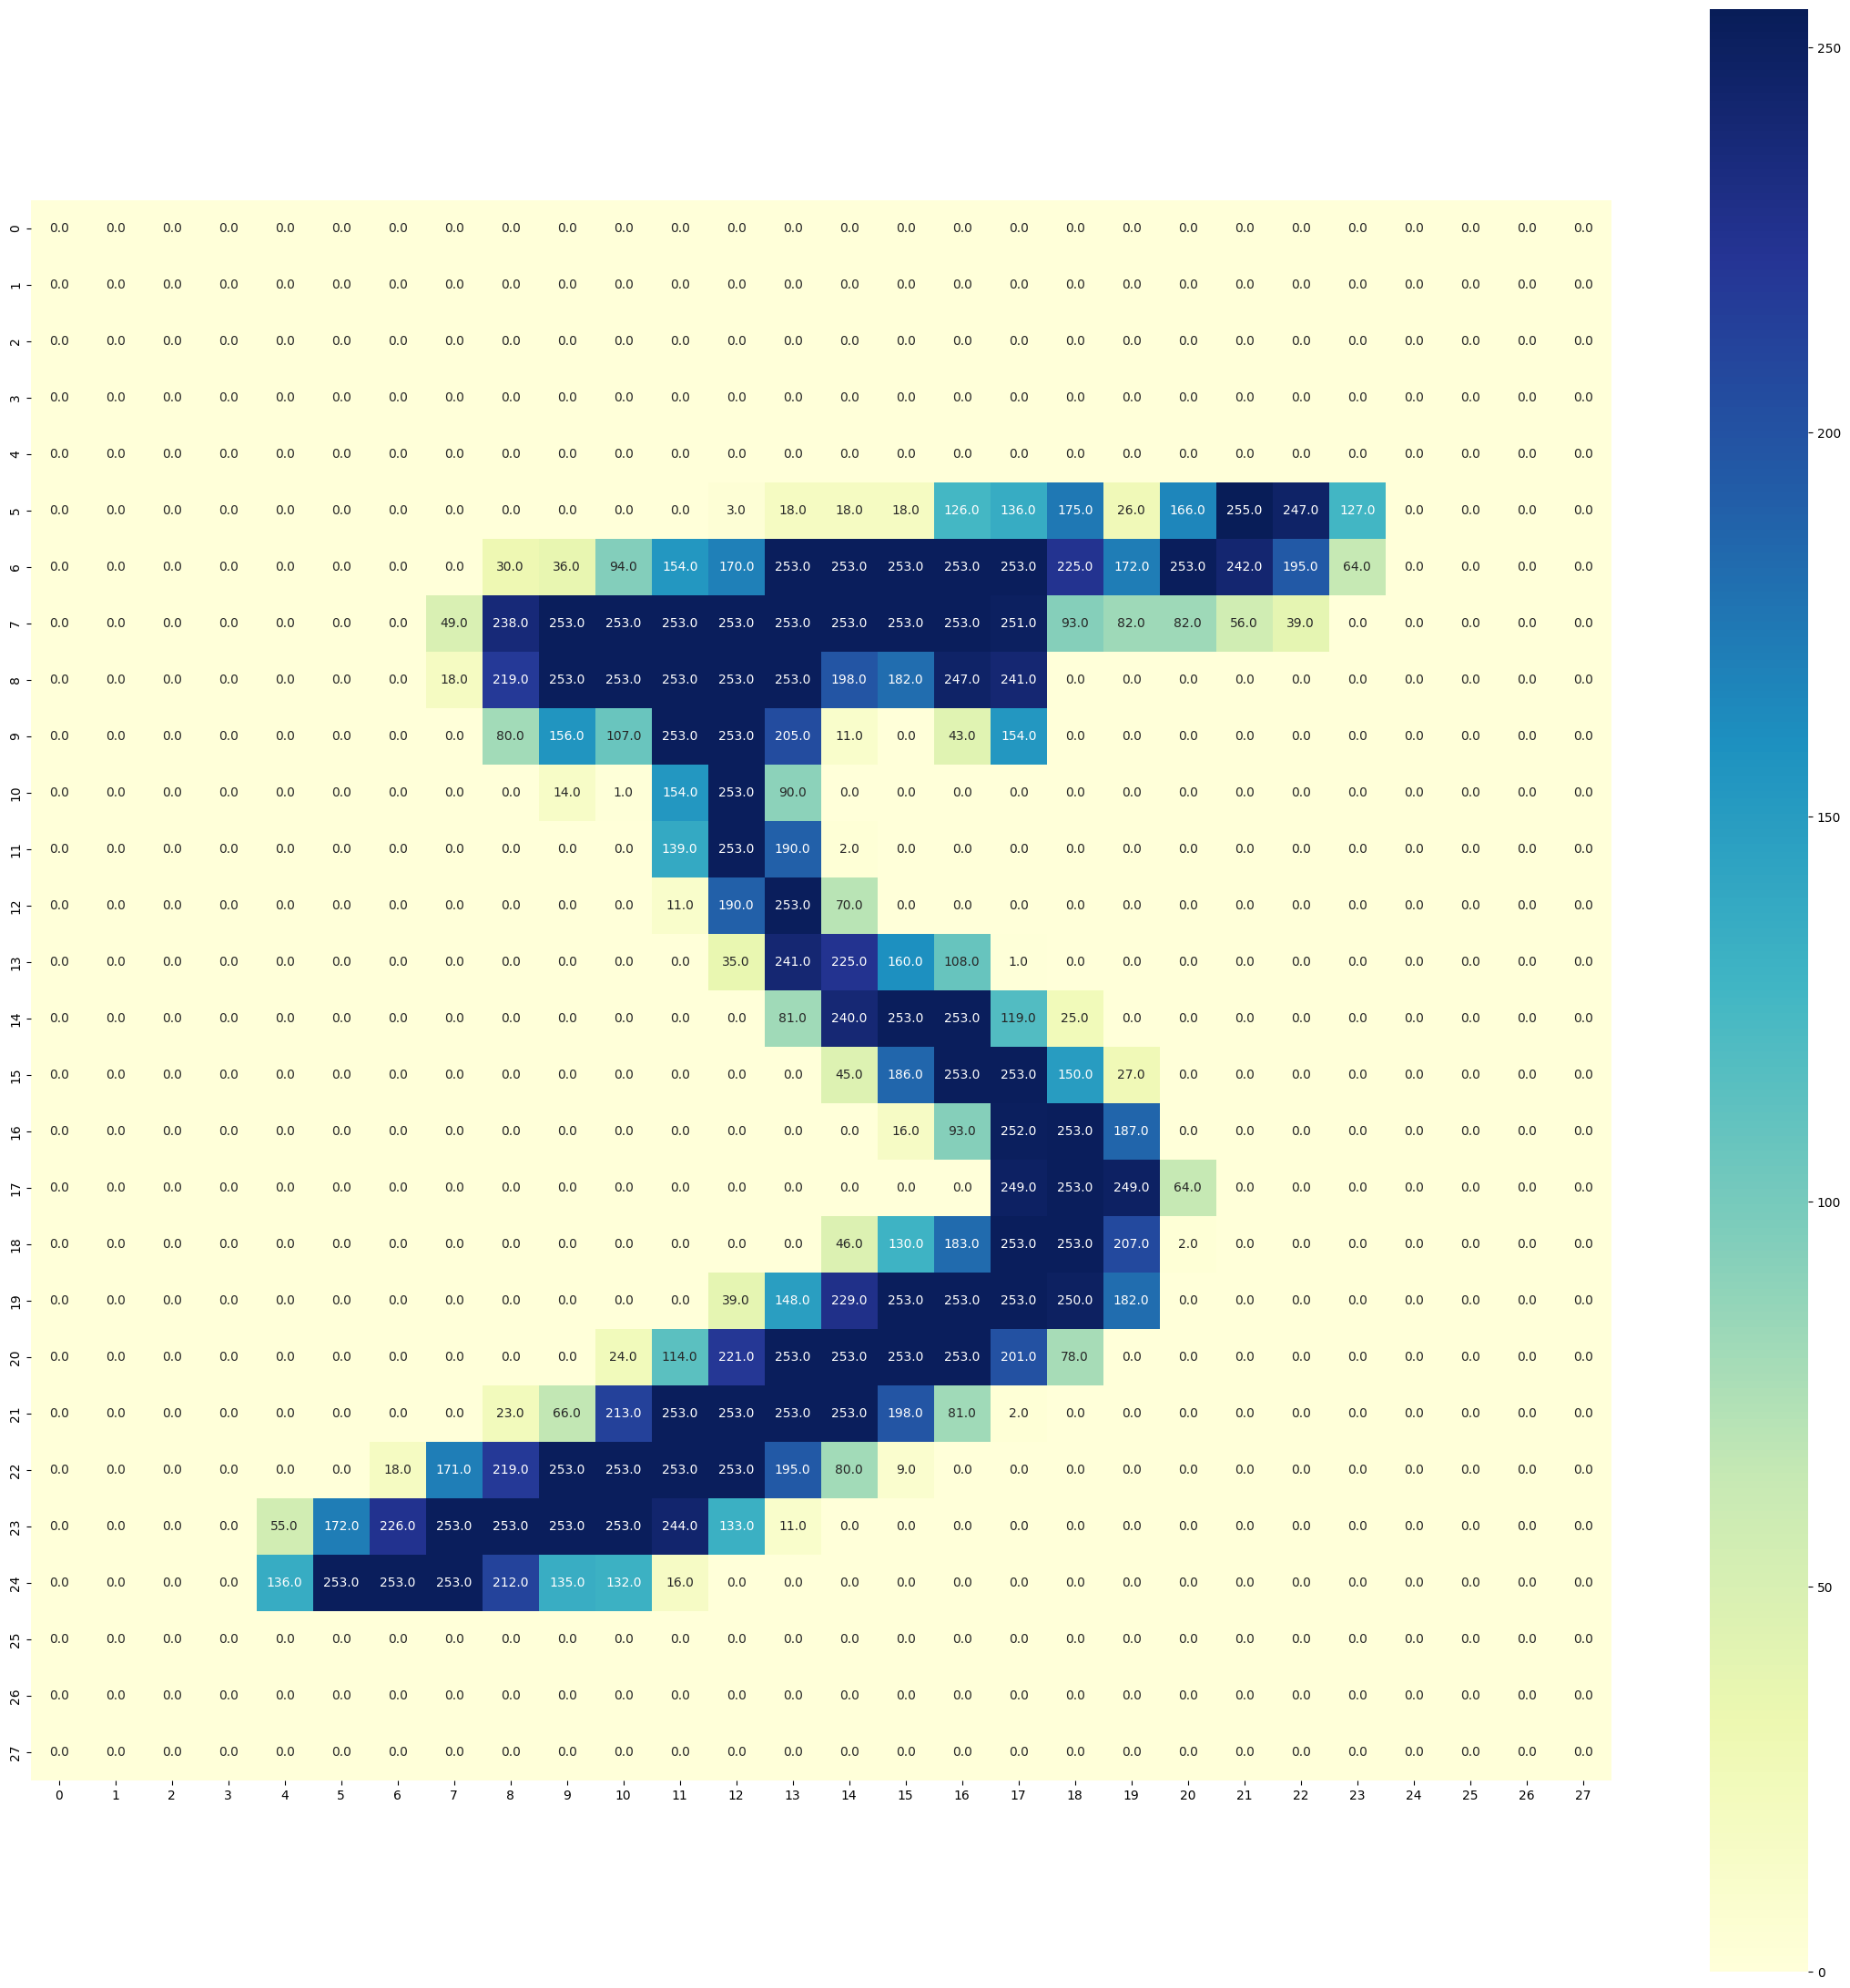

In [4]:
# Using a nice ploting lib
import matplotlib.pyplot as plt

import seaborn as sns

image = X[0].reshape(28,28)
label = y[0]

print("Should display a : " + label)
f, ax = plt.subplots(figsize=(28, 28))
sns.heatmap(image, annot=True, fmt='.1f', square=True, cmap="YlGnBu")
plt.show()

# Bellow we can have a closer view to what the computer will use as data

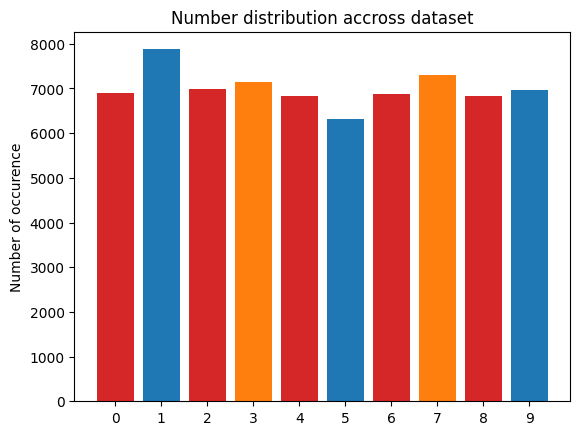

In [5]:
from matplotlib.pyplot import bar

unique, counts = np.unique(y, return_counts=True)

fig, ax = plt.subplots()

bar_colors = ['tab:red', 'tab:blue', 'tab:red', 'tab:orange']

ax.bar(unique, counts, color=bar_colors)

ax.set_ylabel('Number of occurence')
ax.set_title('Number distribution accross dataset')

plt.show()

Looking at above plot we can confirm that there is not much data imbalance. Which is a really good point because this will help us simplify rating models because we won't have a baised prediction induced by lake of training on certain samples.

In [10]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=0)

unique_train, counts_train = np.unique(y_train, return_counts=True)
unique_test, counts_test = np.unique(y_test, return_counts=True)

max_diff_train = ((counts_train.max() - counts_train.min()) / counts_test.sum()) * 100
max_diff_test = ((counts_test.max() - counts_test.min()) / counts_test.sum()) * 100

print("Maximum gap on train set : "+ str(max_diff_train) +" %")
print("Maximum gap on test set : "+ str(max_diff_test) +" %")
print("The distribution accross datasets (even after split) stay consistent")

Maximum gap on train set : 4.372294372294372 %
Maximum gap on test set : 2.3982683982683985 %
The distribution accross datasets (even after split) stay consistent


# Starting machine learning on previously reviewed data

From now we will focuse more on building algorithms that enable us to predict which number is contained in a image.

This will include : 
 - Processing data
 - Comparing models
 - Assesing results

In [7]:
# First of all we will use a DummyClassifier to get an idea of what a uncorrelated model looks like
from sklearn.dummy import DummyClassifier

dummy_clf = DummyClassifier(strategy="stratified")
dummy_clf.fit(X_train, y_train)
ac = round(dummy_clf.score(X_test, y_test) * 100, 2)
print("Using randomly generated answer we get " + str(ac) + "% Accuracy")

dummy_clf = DummyClassifier(strategy="most_frequent")
dummy_clf.fit(X_train, y_train)
ac = round(dummy_clf.score(X_test, y_test) * 100, 2)
print("Using only most frequent number as answer we get " + str(ac) + "% Accuracy")

dummy_clf = DummyClassifier(strategy="uniform")
dummy_clf.fit(X_train, y_train)
ac = round(dummy_clf.score(X_test, y_test) * 100, 2)
print("Using uniform distribution answer we get " + str(ac) + "% Accuracy")

Using randomly generated answer we get 10.12% Accuracy
Using only most frequent number as answer we get 11.4% Accuracy
Using uniform distribution answer we get 10.21% Accuracy


```As we can see, an uncorrelated model will have around 10% accuracy wich is pretty logical beacause complete random is also around 1/10 chance of getting good prediction```

In [13]:
# As target is a non continuous value it's more appropriated to look for classifier models rather than regressors
# Trying basic model KNN
from sklearn.neighbors import KNeighborsClassifier

knn_clf = KNeighborsClassifier()
knn_clf.fit(X_train, y_train)
ac = round(knn_clf.score(X_test, y_test) * 100, 2)
print("Base knn accuracy is around " + str(ac) + "% Accuracy")

Base knn accuracy is around 96.91% Accuracy


This accuracy could be improved using multiples factors : 
 - Unappropriate data structure
 - No parameter adaptation/tunning
 - Accuracy evaluation not representative

In [27]:
# Let's look at common practises on KNN preprocessor : Scaler
from sklearn.preprocessing import StandardScaler

std_scl = StandardScaler()
scaled_data = std_scl.fit_transform(X)
scaled_data[0]

array([ 0.00000000e+00,  0.00000000e+00,  0.00000000e+00,  0.00000000e+00,
        0.00000000e+00,  0.00000000e+00,  0.00000000e+00,  0.00000000e+00,
        0.00000000e+00,  0.00000000e+00,  0.00000000e+00,  0.00000000e+00,
       -4.09033971e-03, -5.32791506e-03, -3.77967173e-03, -3.77967173e-03,
        0.00000000e+00,  0.00000000e+00,  0.00000000e+00,  0.00000000e+00,
        0.00000000e+00,  0.00000000e+00,  0.00000000e+00,  0.00000000e+00,
        0.00000000e+00,  0.00000000e+00,  0.00000000e+00,  0.00000000e+00,
        0.00000000e+00,  0.00000000e+00,  0.00000000e+00,  0.00000000e+00,
       -3.77967173e-03, -5.76560474e-03, -8.56450342e-03, -1.13679013e-02,
       -1.46487258e-02, -1.91989290e-02, -2.44645869e-02, -3.01635248e-02,
       -3.19591431e-02, -3.22334599e-02, -3.30400834e-02, -3.08682833e-02,
       -3.02683577e-02, -2.74423638e-02, -2.29285604e-02, -1.85337642e-02,
       -1.61142119e-02, -1.01805633e-02, -7.70728530e-03, -4.05572859e-03,
        0.00000000e+00,  

Should display a : 5


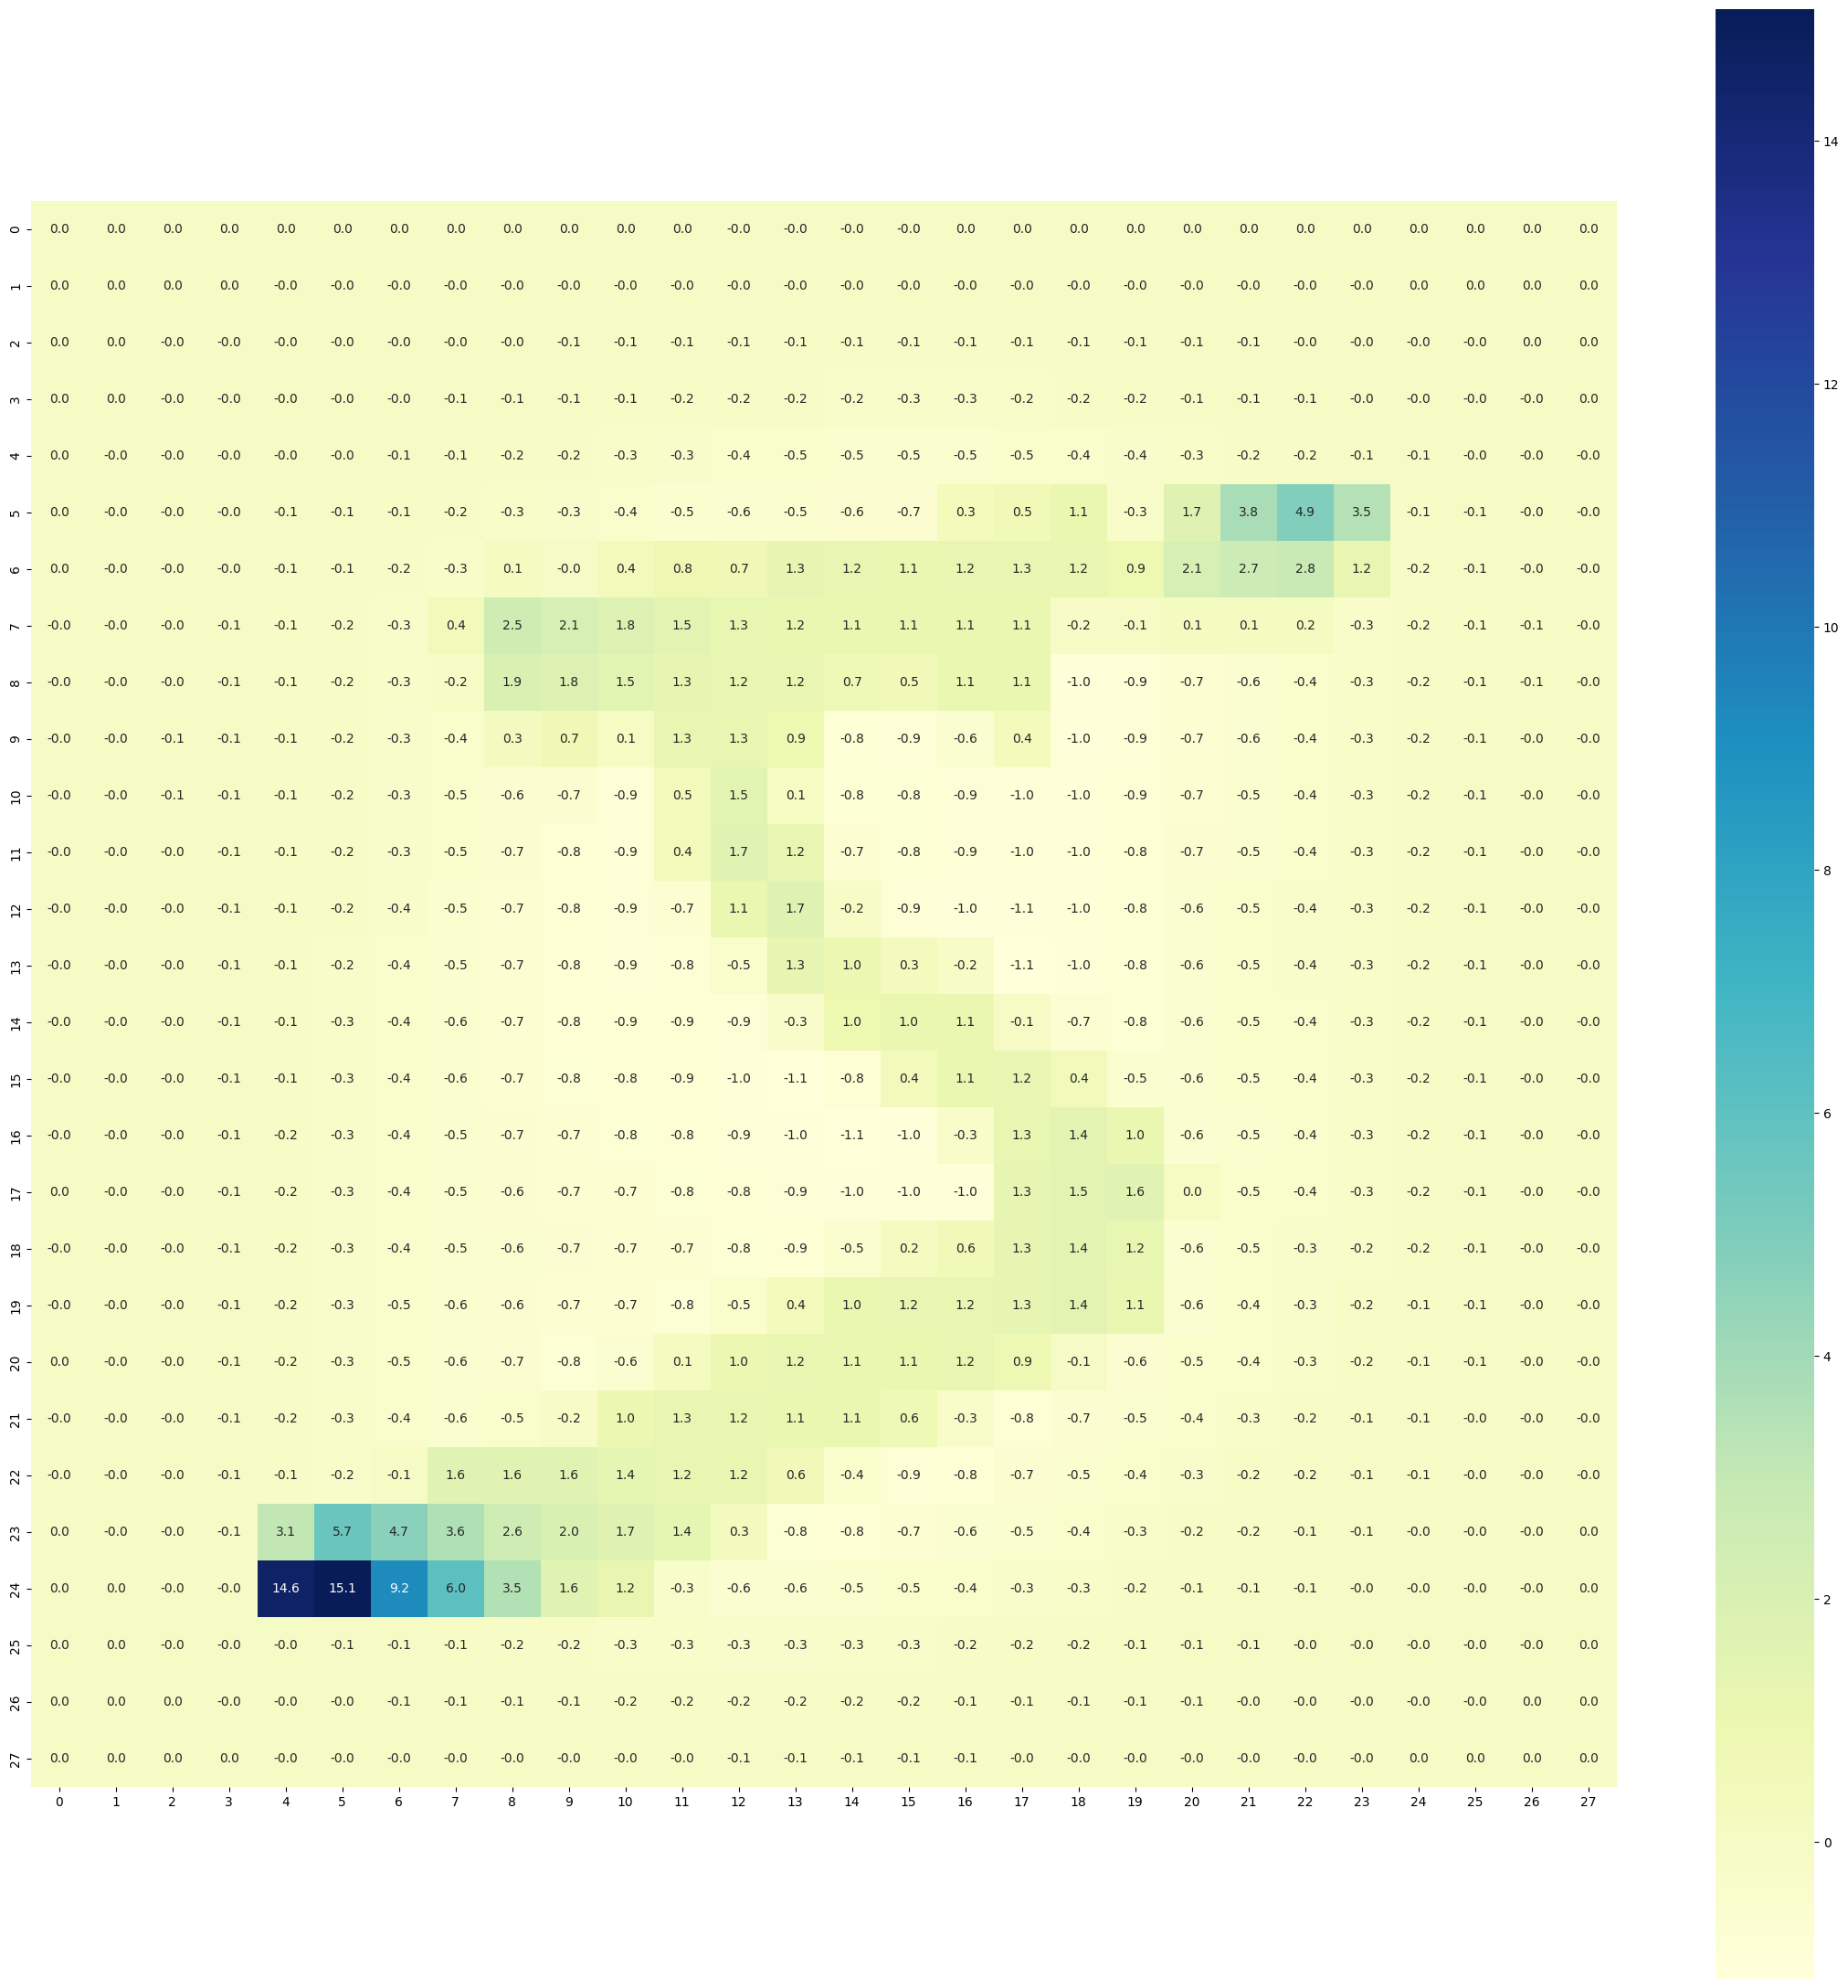

In [28]:

image = scaled_data[0].reshape(28,28)
label = y[0]

print("Should display a : " + label)
f, ax = plt.subplots(figsize=(28, 28))
sns.heatmap(image, annot=True, fmt='.1f', square=True, cmap="YlGnBu")
plt.show()

# Maybe not the best preprocessing !

Looking at the above result we can imagine that tis transformation won't help the model to generalize better

In [22]:
# Let's try preprocess data to extract more feature from our samples data
from sklearn.pipeline import make_pipeline

scaled_pipeline = make_pipeline(StandardScaler(), KNeighborsClassifier())

scaled_pipeline.fit(X_train, y_train)
ac = round(scaled_pipeline.score(X_test, y_test) * 100, 2)
print("Scaled data upon knn accuracy is around " + str(ac) + "% Accuracy")

Scaled data upon knn accuracy is around 94.22% Accuracy


## Scaled data lowers the accuracy of our model !

In [21]:
from sklearn.preprocessing import Normalizer

normalized_pipeline = make_pipeline(Normalizer(), KNeighborsClassifier())


normalized_pipeline.fit(X_train, y_train)
ac = round(normalized_pipeline.score(X_test, y_test) * 100, 2)
print("Normalized data upon knn accuracy is around " + str(ac) + "% Accuracy")

Scaled data upon knn accuracy is around 97.32% Accuracy


## Let's try data normalization instead to keep a more balanced data, easier to compute

In [30]:
# Let's look at common practises on KNN preprocessor : Scaler
from sklearn.preprocessing import Normalizer

nml_scl = Normalizer()
normalized_data = nml_scl.fit_transform(X)
normalized_data[0]

array([0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.     

Should display a : 5


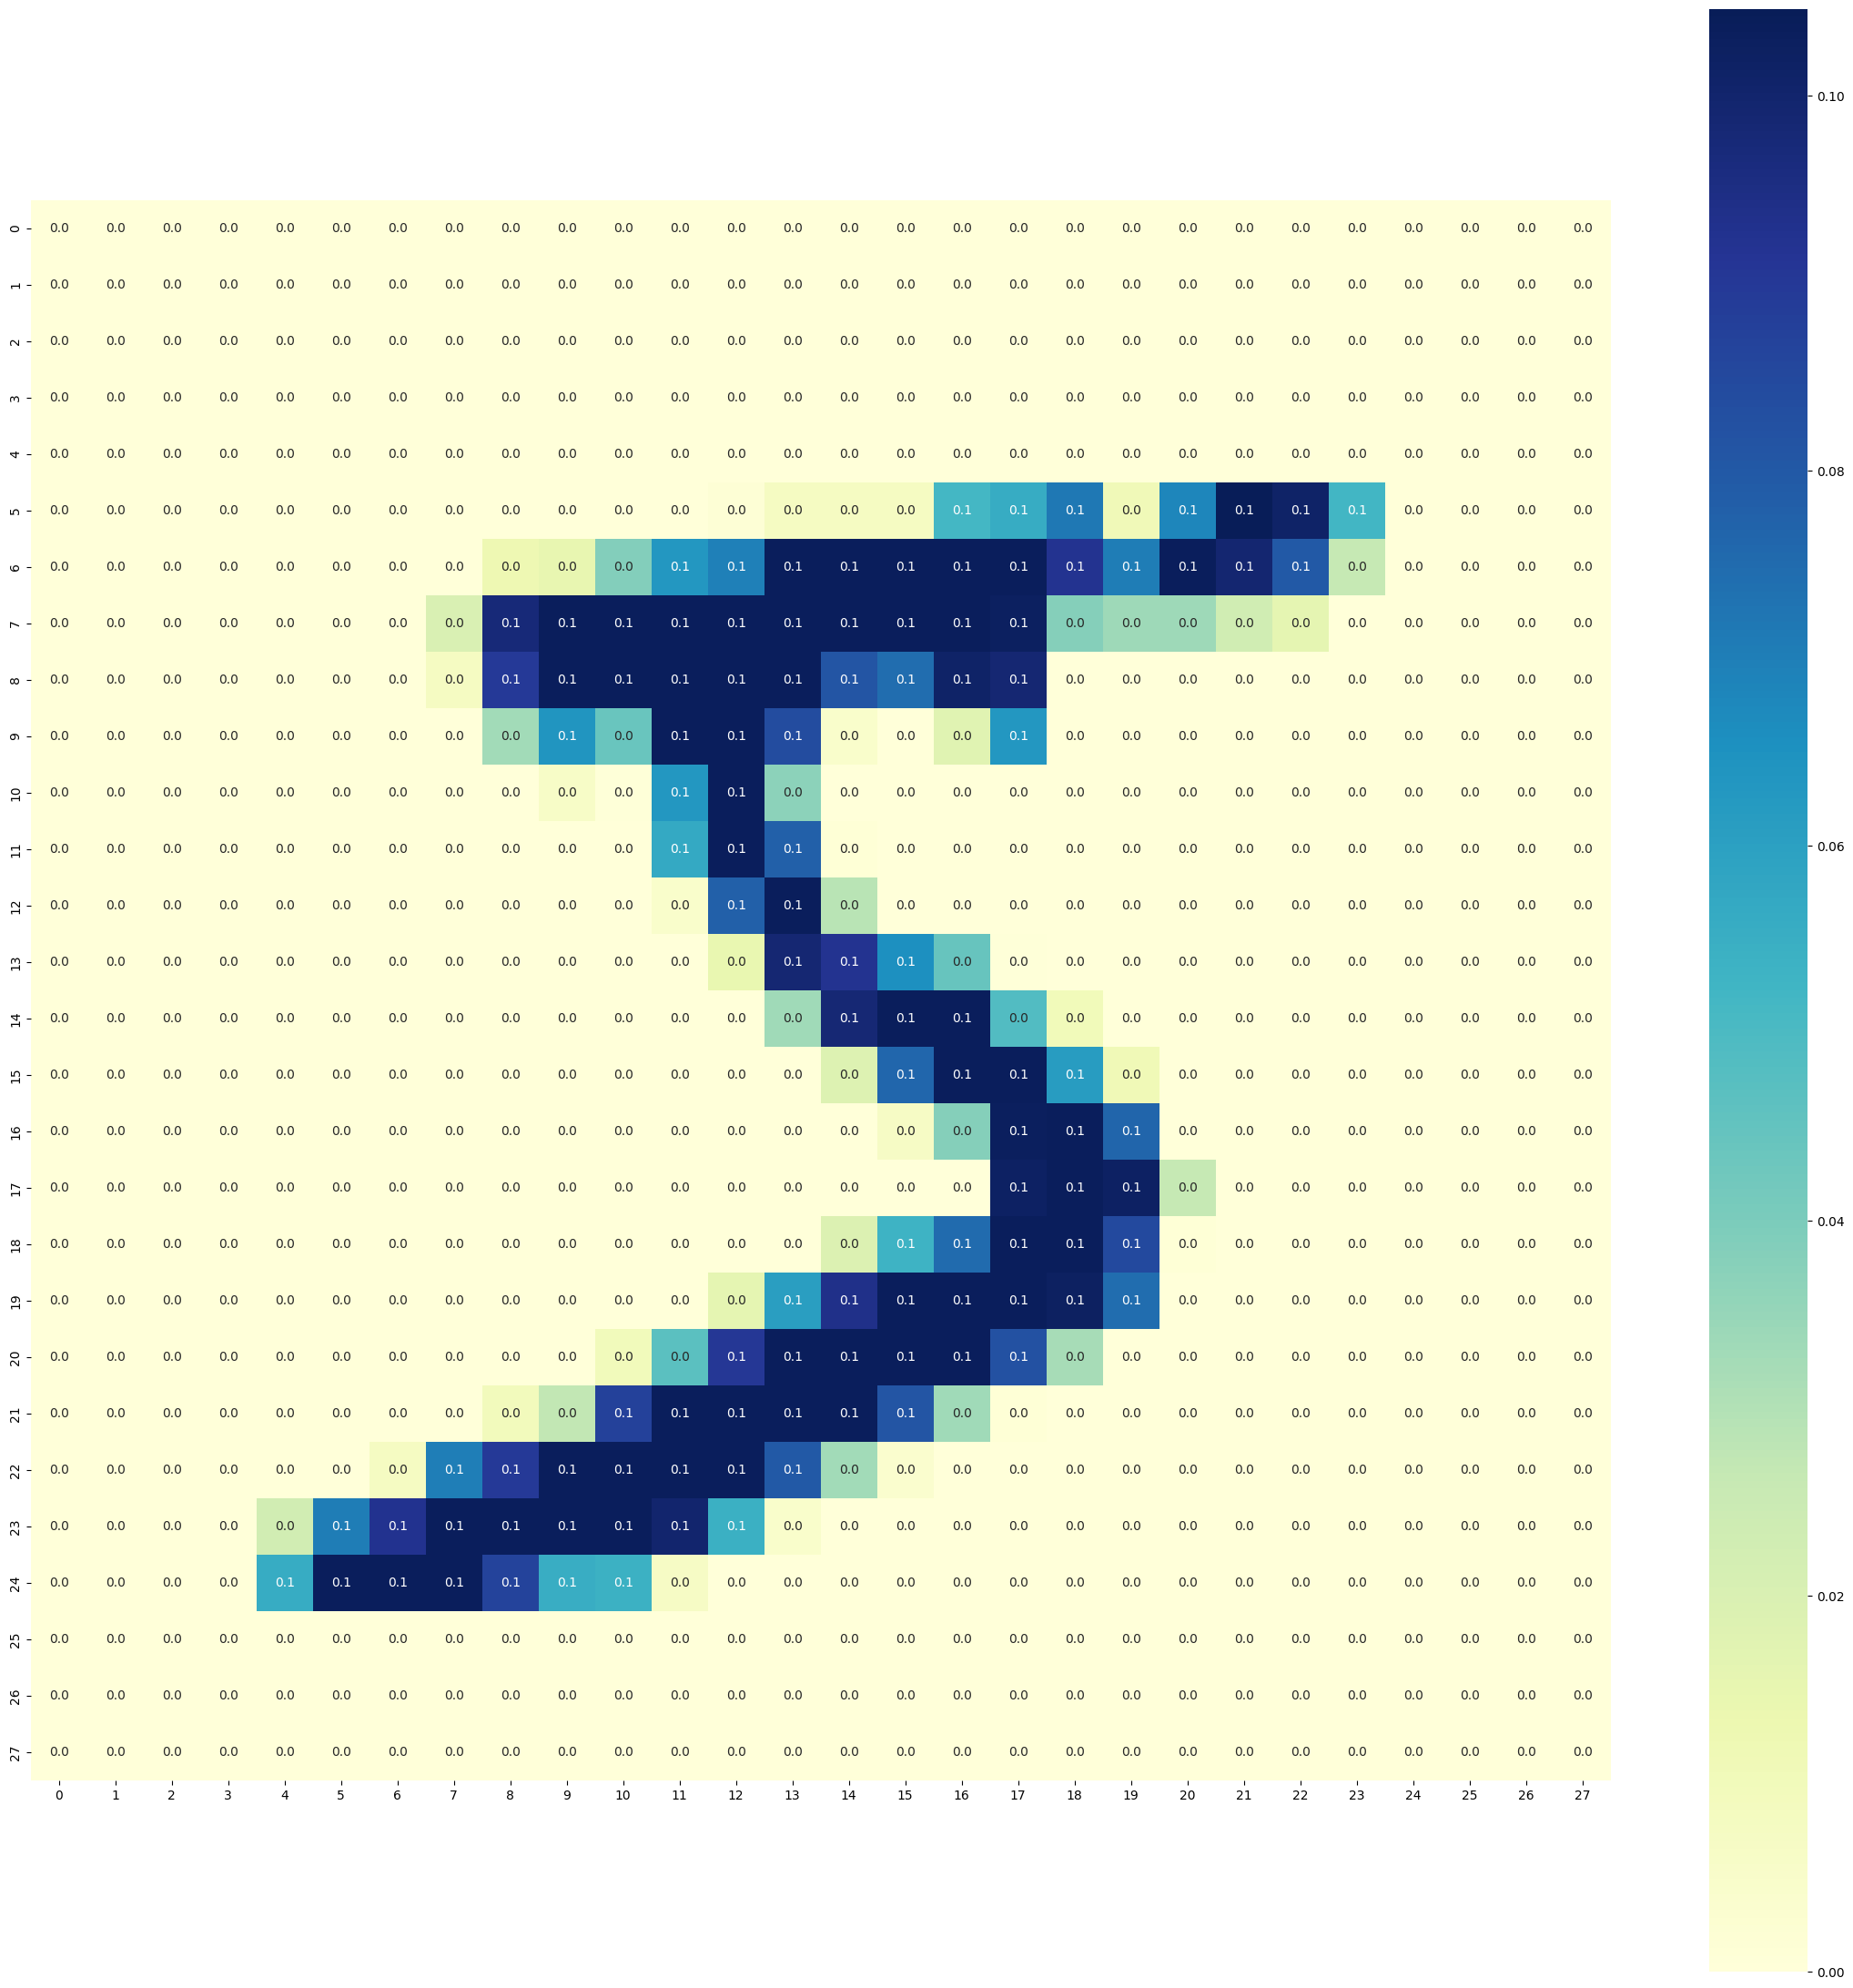

In [31]:
image = normalized_data[0].reshape(28,28)
label = y[0]

print("Should display a : " + label)
f, ax = plt.subplots(figsize=(28, 28))
sns.heatmap(image, annot=True, fmt='.1f', square=True, cmap="YlGnBu")
plt.show()

# We keep balance and lower the values !

In [32]:
from sklearn.pipeline import Pipeline
from sklearn.model_selection import GridSearchCV

scaled_pipeline = Pipeline([
    ('scaler', Normalizer()),
    ('classifier', KNeighborsClassifier())
])

param_grid = {'classifier__n_neighbors': [1, 2, 5, 10, 18]}

model = GridSearchCV(
    scaled_pipeline,
    param_grid=param_grid
).fit(X, y)

ac = round(model.score(X_test, y_test) * 100, 2)
print("Scaled data upon knn accuracy is around " + str(ac) + "% Accuracy")
model.best_params_

Scaled data upon knn accuracy is around 98.49% Accuracy


{'classifier__n_neighbors': 5}

In [33]:
model.best_params_

{'classifier__n_neighbors': 5}

We find out that best value is default one **(n_neighbors=5)** so we could not get any furhter using this parameter either we would risk overffiting

```For now let's try to improve accuracy assesment```

In [34]:
from sklearn.model_selection import cross_validate

optimized_pipeline = Pipeline([
    ('scaler', Normalizer()),
    ('classifier', KNeighborsClassifier(n_neighbors=5))
])

cv_results = cross_validate(optimized_pipeline, X, y, cv=10)
cv_results

{'fit_time': array([0.46345615, 0.5684886 , 0.53266644, 0.53484821, 0.52339101,
        0.48494554, 0.4830699 , 0.49519491, 0.48037648, 0.48109102]),
 'score_time': array([3.70947313, 3.78718996, 3.70548797, 3.99829268, 3.78075075,
        3.57041025, 3.59205103, 3.63391805, 3.60873008, 3.6256988 ]),
 'test_score': array([0.97842857, 0.97357143, 0.97485714, 0.97414286, 0.97542857,
        0.97471429, 0.97314286, 0.97357143, 0.97457143, 0.97885714])}

In [35]:
accuracy = cv_results["test_score"].mean() * 100
print("Cross validate + normalized data +  optimized params = " + str(accuracy) + "% Accuracy")

Cross validate + normalized data +  optimized params = 97.51285714285714% Accuracy


Confusion matrix:
[[2286    1    1    0    0    0    5    1    2    0]
 [   1 2619   10    0    2    0    0    1    0    0]
 [  10    5 2267    2    2    0    2   13   11    3]
 [   5    6   14 2248    1   13    0    9   40   13]
 [   2    6    1    0 2112    0    4    4    3   59]
 [   9    2    1   19    1 1994   30    1    7   15]
 [   6    4    0    0    4   10 2215    0    2    0]
 [   3   15   11    0    7    0    0 2348    1   37]
 [   5   30    3   19    3   15    9    3 2131   16]
 [  10    6    2   17   14    2    3   18    6 2262]]


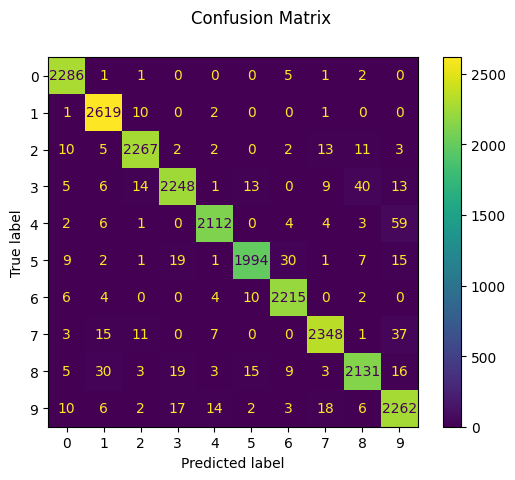

In [37]:
from sklearn.metrics import ConfusionMatrixDisplay
optimized_pipeline.fit(X_train, y_train)
y_pred = optimized_pipeline.predict(X_test)
disp = ConfusionMatrixDisplay.from_predictions(y_test, y_pred)
disp.figure_.suptitle("Confusion Matrix")
print(f"Confusion matrix:\n{disp.confusion_matrix}")

plt.show()

In [15]:
sample = KNeighborsClassifier().fit(X_train, y_train)
y_pred = sample.predict(X_test)
disp = ConfusionMatrixDisplay.from_predictions(y_test, y_pred)
disp.figure_.suptitle("Confusion Matrix")
print(f"Confusion matrix:\n{disp.confusion_matrix}")

plt.show()

NameError: name 'ConfusionMatrixDisplay' is not defined

In [6]:
from sklearn import svm
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import Normalizer
from sklearn.model_selection import cross_validate

svm_pipeline = Pipeline([
    ('scaler', Normalizer()),
    ('classifier', svm.LinearSVC())
])

cv_results = cross_validate(svm_pipeline, X, y, cv=4)
cv_results["test_score"].mean()

c:\Users\chapu\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\svm\_classes.py:31: FutureWarning: The default value of `dual` will change from `True` to `'auto'` in 1.5. Set the value of `dual` explicitly to suppress the warning.
  warnings.warn(
c:\Users\chapu\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\svm\_classes.py:31: FutureWarning: The default value of `dual` will change from `True` to `'auto'` in 1.5. Set the value of `dual` explicitly to suppress the warning.
  warnings.warn(
c:\Users\chapu\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\svm\_classes.py:31: FutureWarning: The default value of `dual` will change from `True` to `'auto'` in 1.5. Set the value of `dual` explicitly to suppress the warning.
  warnings.warn(
c:\Users\chapu\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\svm\_classes.py:31: FutureWarning: The default value of `dual` will change from `True` to `'auto'` in 1.5. Set the value of 

0.9155285714285715

## So far we did not use other metrics than accuracy, let's correct that

In [16]:
from sklearn.metrics import precision_score

prec = precision_score(y_test, y_pred, average='weighted')
prec

0.9692876446169878

In [18]:
from sklearn.metrics import recall_score

reca = recall_score(y_test, y_pred, average='weighted')
reca

0.9691341991341992

Maybe svm.linearSVC could get a better precision so we check


In [20]:
svm_pipeline.fit(X_train, y_train)
y_pred = svm_pipeline.predict(X_test)

reca = recall_score(y_test, y_pred, average='weighted')
prec = precision_score(y_test, y_pred, average='weighted')
print("Recall score is " + str(reca))
print("Precision score is " + str(prec))

c:\Users\chapu\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\svm\_classes.py:31: FutureWarning: The default value of `dual` will change from `True` to `'auto'` in 1.5. Set the value of `dual` explicitly to suppress the warning.
  warnings.warn(


Recall score is 0.9125974025974026
Precision score is 0.9122182815713487


# Conclusion

